# Aprendizaje Supervisado: Laboratorio 1

## Ejercicio 1: SVM con Kernel y Regularización

En este ejercicio se trabajará con datos que esconden un patrón. Los datos mezclan columnas con valores enteros, flotantes y booleanos.


Debe analizar los datos de entrenamiento para encontrar el patrón, y luego entrenar una SVM que explique a la perfección esos datos (accuracy 1.0 en train). Por último, deberá evaluar la SVM en los datos de test, y modificar los parámetros de regularización hasta encontrar una configuración que dé una accuracy mayor a 0.9.

In [1]:
#importacion librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# cargar datos de entrenamiento y evaluación

train = pd.read_csv('datasets/lab1/ej1_train.csv')
X_train = train.iloc[:, :-1]
Y_train = train['TARGET']
test = pd.read_csv('datasets/lab1/ej1_test.csv')
X_test = test.iloc[:, :-1]
Y_test = test['TARGET']

### Ejercicio 1a:

Primero imprima una descripción básica de los datos.

Luego, calcule y grafique un mapa de calor con la correlación entre los distintos features.

**Preguntas:**
- ¿Qué observa?
- ¿Qué conclusiones puede extraer?

Por último, reduzca la dimensionalidad de los datos a dos dimensiones y grafique los puntos.

**Preguntas:**
- ¿Qué observa?
- ¿Qué conclusiones puede extraer?


In [3]:

# COMPLETAR: calcular y graficar correlación entre features
# AYUDA: https://www.kaggle.com/pierra/credit-card-dataset-svm-classification

def plot_correlacion(df): 
    df_corr = df.corr()
    plt.figure(figsize=(10,5))
    sns.heatmap(df_corr, cmap="YlGnBu")
    sns.set(font_scale=1,style='white')

    plt.title('Heatmap correlation')
    plt.show()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,TARGET
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000
mean,100.567500,101.035000,98.930000,100.445000,98.487500,0.007970,-0.009065,-0.019228,-0.009865,0.03500,0.08750,0.172500,0.237500,0.220000,0.132500,0.075000,0.040000,-0.00500
std,86.549654,49.517155,91.403921,62.199267,36.299366,0.782708,0.560037,0.514925,0.924287,0.18401,0.28292,0.378288,0.426084,0.414765,0.339458,0.263721,0.196205,1.00124
min,-93.000000,-10.000000,-115.000000,-39.000000,11.000000,-1.725988,-1.300851,-1.244842,-2.168412,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.00000
25%,46.000000,73.000000,37.500000,61.750000,73.000000,-0.488926,-0.366255,-0.382066,-0.646990,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.00000
50%,100.500000,100.000000,100.000000,100.000000,99.500000,0.005970,-0.010120,-0.013890,0.000883,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.00000
75%,155.250000,133.250000,153.250000,140.000000,122.000000,0.510675,0.314739,0.300218,0.544438,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
max,299.000000,217.000000,323.000000,243.000000,185.000000,1.785821,1.369928,1.217912,2.240643,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,TARGET
0,-15.0,20.0,26.0,17.0,117.0,-1.099921,-0.366696,0.136307,-0.777322,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0
1,35.0,87.0,-17.0,54.0,38.0,-0.507798,-0.774667,-0.879107,-1.159231,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
2,82.0,75.0,116.0,87.0,130.0,-0.219868,0.157875,0.386982,0.150254,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,133.0,138.0,87.0,124.0,61.0,0.371992,-0.157556,-0.484258,-0.109378,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0
4,-17.0,23.0,17.0,16.0,109.0,-1.099966,-0.436268,0.028073,-0.869315,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0


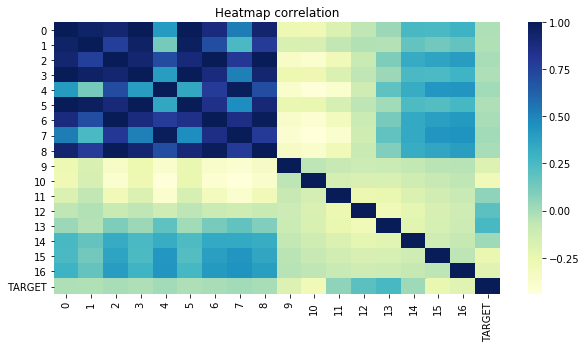

In [4]:
display(train.describe())
display(train.head())
plot_correlacion(train)

In [5]:
from sklearn.decomposition import PCA

In [6]:
pca = PCA(n_components=2)

pca_fit = pca.fit_transform(X_train)

# display(pca_fit)

pc_df = pd.DataFrame(data=pca_fit, columns=['PC_1', 'PC_2'])
pc_df = pd.concat([pc_df, Y_train], axis=1)

display(pc_df.head())

,PC_1,PC_2,TARGET
0,-169.452309,61.923209,-1.0
1,-140.637635,-63.051982,-1.0
2,-9.971975,48.867243,1.0
3,28.025112,-61.117568,-1.0
4,-176.649479,51.593234,-1.0


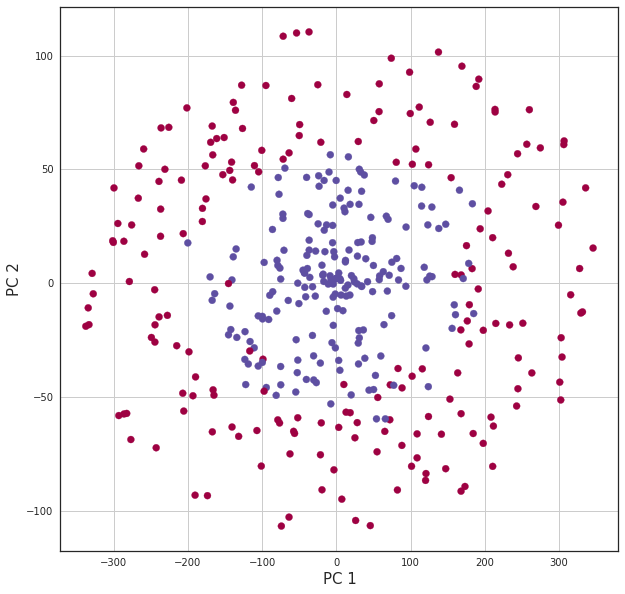

In [7]:
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('PC 1', fontsize=15)
ax.set_ylabel('PC 2', fontsize=15)
# ax.set_title('PC in Train - 2 component', fontsize=20)

ax.scatter(pc_df['PC_1'], pc_df['PC_2'], c=pc_df['TARGET'], cmap=plt.cm.Spectral)
ax.grid()

,8,9,10,11,12,13,14,15,16,TARGET
count,400.000000,400.00000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000
mean,-0.009865,0.03500,0.08750,0.172500,0.237500,0.220000,0.132500,0.075000,0.040000,-0.00500
std,0.924287,0.18401,0.28292,0.378288,0.426084,0.414765,0.339458,0.263721,0.196205,1.00124
min,-2.168412,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.00000
25%,-0.646990,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.00000
50%,0.000883,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.00000
75%,0.544438,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
max,2.240643,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


,8,9,10,11,12,13,14,15,16,TARGET
0,-0.777322,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0
1,-1.159231,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
2,0.150254,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-0.109378,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0
4,-0.869315,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0


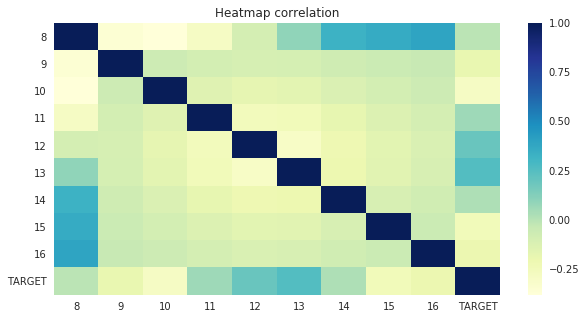

In [8]:
# COMPLETAR: reducir dimensionalidad y graficar

dropped_train = train.drop(columns=['0', '1', '2', '3', '4', '5', '6', '7'])
display(dropped_train.describe())
display(dropped_train.head())
plot_correlacion(dropped_train)
# del train['PassengerId']

### Ejercico 1b:

Primero calcule la accuracy sobre train para una SVM con kernel lineal.

In [9]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

clf = LinearSVC(random_state=0)
clf.fit(X_train, Y_train)

y_pred = clf.predict(X_train)
print('Accuracy in Train =', accuracy_score(Y_train, y_pred))

Accuracy in Train = 0.6125


**Preguntas:**
- ¿Cuál es la accuracy?
- ¿Qué problema tiene el modelo? ¿De sesgo (bias) o de varianza?

Modifique la SVM para lograr una accuracy en train de 1.0.

In [10]:
from sklearn.svm import SVC

clf = SVC(random_state=0)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_train)
print('Accuracy en train:\t', accuracy_score(Y_train, Y_pred))
Y_pred = clf.predict(X_test)
print('Accuracy en test:\t', accuracy_score(Y_test, Y_pred))


Accuracy en train:	 1.0
Accuracy en test:	 0.7


### Ejercicio 1c:

Evalúe la SVM del ítem anterior sobre los datos de test.

**Preguntas:**
- ¿Cuál es la accuracy en test?
- ¿Qué problema tiene el modelo? ¿De sesgo (bias) o de varianza?

Modifique parámetros de la SVM para lograr una accuracy en test mayor a 0.9.
La accuracy en train puede ser menos de 1.0.

Puede buscar los valores apropiados a mano o usar grid search.

In [11]:
%%time

# ORIGINAL

from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
clf = LinearSVC(random_state=0)  # CAMBIAR!
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_train)
print('Accuracy en train:\t', accuracy_score(Y_train, Y_pred))
Y_pred = clf.predict(X_test)
print('Accuracy en test:\t', accuracy_score(Y_test, Y_pred))

Accuracy en train:	 0.6125
Accuracy en test:	 0.67
CPU times: user 109 ms, sys: 15.6 ms, total: 125 ms
Wall time: 165 ms


In [12]:
%%time

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# C=1.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', random_state=None

exploring_params = {
    'C':[0.6, 0.7, 0.75, 0.8, 0.85 ,0.9, 0.95],
    #'C':[0.001, 0.005, 0.01, 0.02,0.1, 0.25, 0.5, ],
    'tol': [ 1e-2,1e-1], 
    #,1e-3
    'gamma': [ 0.0003, 0.0004, 0.0005, 0.0007, 0.001,],
    # 0.0001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.6, 0.7, 0.8, 0.9
    'kernel' : [ 'rbf'],
    #,'sigmoid',
    #'decision_function_shape' :0.0003,  ['ovo']
}

# m = SGDClassifier(penalty=penalty,tol=1e-3,max_iter=1000)
# m = LogisticRegression(penalty = penalty)    
#clf = GridSearchCV(estimator=m, param_grid=param_grid, cv=n_cross_validation, scoring=score)
#clf.fit(X_train, y_train)

clf = GridSearchCV(SVC(random_state=0), param_grid=exploring_params, cv=7, scoring = 'roc_auc')
clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_train)
print('Accuracy en train:\t', accuracy_score(Y_train, Y_pred))
Y_pred = clf.predict(X_test)
print('Accuracy en test:\t', accuracy_score(Y_test, Y_pred))

print(clf.best_params_)

Accuracy en train:	 0.935
Accuracy en test:	 0.9
{'C': 0.9, 'gamma': 0.0004, 'kernel': 'rbf', 'tol': 0.1}
CPU times: user 16.7 s, sys: 141 ms, total: 16.8 s
Wall time: 17 s


In [13]:
clf = SVC(random_state=0,C=0.75,tol=0.01, gamma=0.0001,kernel='rbf',decision_function_shape='ovo') 
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_train)
print('Accuracy en train:\t', accuracy_score(Y_train, Y_pred))
Y_pred = clf.predict(X_test)
print('Accuracy en test:\t', accuracy_score(Y_test, Y_pred))

Accuracy en train:	 0.9275
Accuracy en test:	 0.89


## Ejercicio 2: Revisitando el Titanic

Este ejercicio se basa en el siguiente análisis de datos visto en clase:

- https://www.kaggle.com/zlatankr/titanic-random-forest-82-78/notebook

Aquí, se logra entrenar una Random Forest con un out-of-bag score de 0.8294.


### Ejercicio 2a:

El objetivo de este ejercicio es ver cuánto da el score si no se quiere hacer ninguna preparación de los datos.

Para esto, deben eliminarse las columnas que no tienen datos numéricos y las que tienen datos incompletos, ya que los algoritmos de aprendizaje automático no saben lidiar con ellos.

In [14]:
# cargar los datos


# Sin mejoras

import pandas as pd

train = pd.read_csv('datasets/titanic/train.csv')

display(train.info())
display(train.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


None

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
# COMPLETAR: eliminar las columnas que no tienen números, y las que tienen datos incompletos.
del train['PassengerId']  # eliminar ids
del train['Age']
del train['Cabin']
del train['Name']
del train['Sex']
del train['Embarked']
del train['Ticket']

In [16]:
display(train.info())
display(train.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(1), int64(4)
memory usage: 34.9 KB


None

,Survived,Pclass,SibSp,Parch,Fare
0,0,3,1,0,7.2500
1,1,1,1,0,71.2833
2,1,3,0,0,7.9250
3,1,1,1,0,53.1000
4,0,3,0,0,8.0500


In [17]:
# entrenar la misma Random Forest, e imprimir el out-of-bag score

# Sin mejoras

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(train.iloc[:, 1:], train.iloc[:, 0])
print("%.4f" % rf.oob_score_)

0.7172


### Ejercicio 2b:

En este ejercicio deberá hacer tres mejoras en la preparación de los datos:

- Completar la columna "Age" y usarla.
- Agregar una nueva columna con el largo del nombre.
- Convertir la columna "Sex" a valores numéricos y usarla.

Calcular el OOB score de cada una de las mejoras por separado.

**Responda**: ¿Cuál de las tres mejoras aporta más?

In [18]:
# cargar nuevamente los datos
#import pandas as pd

# mejora nameLength

train = pd.read_csv('datasets/titanic/train.csv')

display(train.info())
display(train.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


None

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
del train['PassengerId']  # eliminar ids
del train['Cabin']
del train['Sex']
del train['Embarked']
del train['Ticket']

In [20]:
# COMPLETAR: completar con el valor medio los datos faltantes en el campo Age

display(train.info())

train.Age=train.Age.fillna(train.Age.mean(),)

display(train.info())

#df.fillna(df.mean())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.8+ KB


None

In [21]:
train.Name=train.Name.fillna("")

In [22]:
# COMPLETAR: agregar columna con el largo del nombre

train['nameLength'] = train['Name'].apply(len)

train.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,nameLength
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,23
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,51
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,22
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,44
4,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,24


In [23]:
del train['Name']

In [24]:
#Mejora nameLength

rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(train.iloc[:, 1:], train.iloc[:, 0])
print("%.4f" % rf.oob_score_)

0.7576


In [25]:
# mas mejor :P

In [26]:
train = pd.read_csv('datasets/titanic/train.csv')

display(train.info())
display(train.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


None

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
del train['PassengerId']  # eliminar ids
del train['Cabin']
del train['Embarked']
del train['Ticket']

train['nameLength'] = train['Name'].apply(len)
train.Age=train.Age.fillna(train.Age.mean(),)

train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,nameLength
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,23
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,51
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,22
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,44
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,24


In [28]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [29]:
def mapSex(sex):
    if(sex=='male'):
        return 1
    if(sex=='female'):
        return 2

In [30]:
train['Sex'] = train['Sex'].apply(mapSex)

In [31]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,nameLength
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,23
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,71.2833,51
2,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,7.9250,22
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,53.1000,44
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,24


In [32]:
del train['Name']

In [33]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,nameLength
0,0,3,1,22.0,1,0,7.2500,23
1,1,1,2,38.0,1,0,71.2833,51
2,1,3,2,26.0,0,0,7.9250,22
3,1,1,2,35.0,1,0,53.1000,44
4,0,3,1,35.0,0,0,8.0500,24


In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
nameLength    891 non-null int64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [35]:
# COMPLETAR: poner 1 en lugar de 'female' y 0 en lugar de 'male'
# AYUDA: DEFINIR LA FUNCIÓN f Y HACER:
# train['Sex'] = train['Sex'].apply(f)

In [36]:
# COMPLETAR: eliminar las columnas que deban ser eliminadas

In [37]:
%%time

# EJECUTAR ESTO TRES VECES, UNA VEZ PARA CADA MEJORA.
# entrenar el Random Forest, e imprimir out-of-bag score
#from sklearn.ensemble import RandomForestClassifier


# Mas mejor :P

rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(train.iloc[:, 1:], train.iloc[:, 0])
print("%.4f" % rf.oob_score_)

0.8339
CPU times: user 5.95 s, sys: 266 ms, total: 6.22 s
Wall time: 6.58 s
